✅ File tồn tại, tiếp tục đọc dữ liệu.
          Ngày       Sản phẩm  Số lượng bán Đơn giá (VND) Tổng giá trị (VND)  \
0   29/10/2024     Khẩu trang            19        79,714          1,514,566   
1   10/01/2024  Nước rửa chén            14       129,407          1,811,698   
2   14/07/2024       Bột giặt            48        42,497          2,039,856   
3   07/10/2024        Sữa tắm            34       141,405          4,807,770   
4   16/10/2024        Dầu gội            13       148,915          1,935,895   
5   25/08/2024      Băng dính            34        51,944          1,766,096   
6   14/05/2024    Nước xả vải            18        29,148            524,664   
7   28/12/2024   Giấy vệ sinh            24       124,090          2,978,160   
8   11/09/2024  Kem đánh răng            48        76,478          3,670,944   
9   07/10/2024       Bột giặt            37        40,563          1,500,831   
10  22/09/2024  Kem đánh răng             5       198,580            992,900   
11

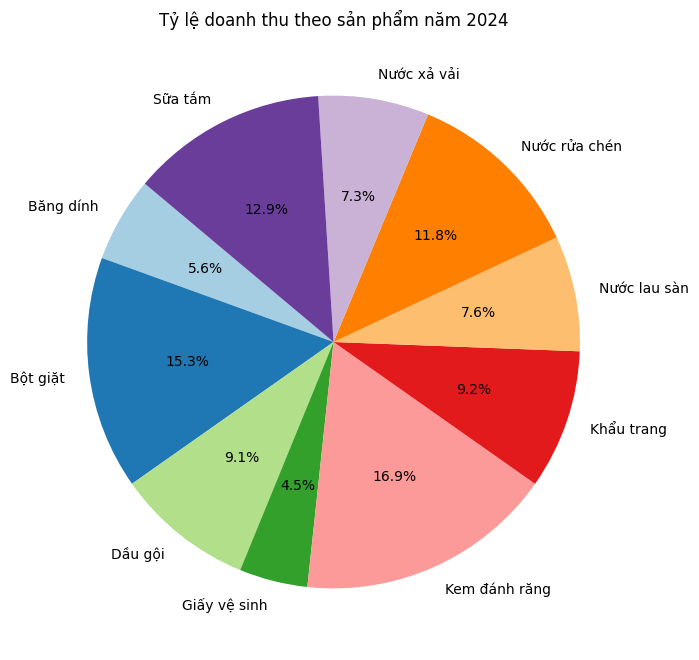

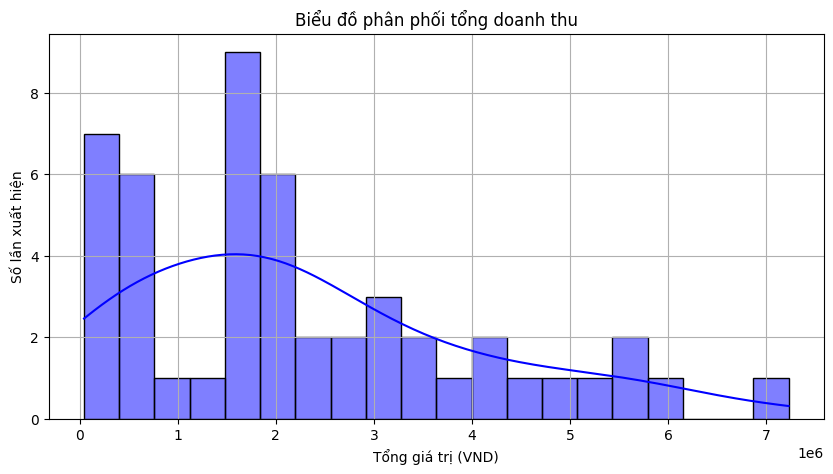

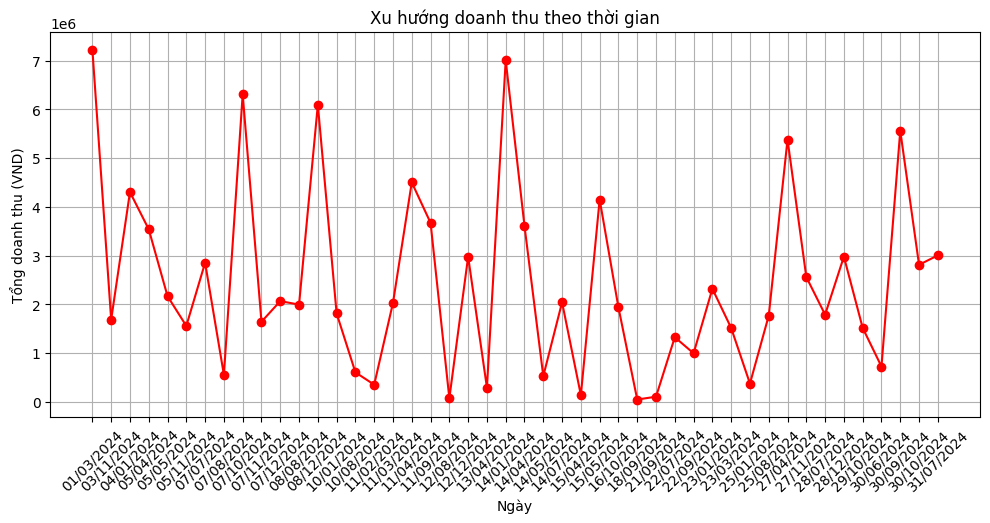

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn file trên Google Drive

file_path = "/content/drive/MyDrive/Du_lieu_hang_tap_hoa (1).xlsx"
# Kiểm tra xem file có tồn tại không
if os.path.exists(file_path):
    print("✅ File tồn tại, tiếp tục đọc dữ liệu.")
else:
    print("⚠️ File không tồn tại, kiểm tra lại đường dẫn!")

  # Đọc dữ liệu từ file Excel
df = pd.read_excel(file_path)
# Hiển thị 25 dòng đầu tiên
print(df.head(25))

# Xem thông tin tổng quan về dữ liệu
print(df.info())

# Chuyển đổi cột 'Tổng giá trị (VND)' sang kiểu số (xóa dấu phẩy)
df['Tổng giá trị (VND)'] = df['Tổng giá trị (VND)'].str.replace(',', '').astype(float)

# Tính toán trung bình, phương sai và độ lệch chuẩn
trung_binh = df['Tổng giá trị (VND)'].mean()
phuong_sai = df['Tổng giá trị (VND)'].var()
do_lech_chuan = df['Tổng giá trị (VND)'].std()

# In kết quả
print(f"Trung bình: {trung_binh:.2f} VND")
print(f"Phương sai: {phuong_sai:.2f} VND^2")
print(f"Độ lệch chuẩn: {do_lech_chuan:.2f} VND")

# Kiểm tra các giá trị thiếu
print("Số giá trị thiếu trong từng cột:")
print(df.isnull().sum())
# Kiểm tra dữ liệu trùng lặp
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp: {duplicate_count}")

# Xem một số thống kê của dữ liệu
print(df.describe(include="all"))

# Chuyển đổi cột 'Tổng giá trị (VND)' sang số (loại bỏ dấu phẩy nếu có)
df["Tổng giá trị (VND)"] = df["Tổng giá trị (VND)"].replace(",", "", regex=True).astype(float)

# Tính tổng doanh thu theo từng sản phẩm
product_sales = df.groupby("Sản phẩm")["Tổng giá trị (VND)"].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(product_sales, labels=product_sales.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)

# Thêm tiêu đề
plt.title("Tỷ lệ doanh thu theo sản phẩm năm 2024")

# Hiển thị biểu đồ
plt.show()
# Biểu dồ phân phối
plt.figure(figsize=(10, 5))
sns.histplot(df["Tổng giá trị (VND)"], bins=20, kde=True, color="blue")
plt.xlabel("Tổng giá trị (VND)")
plt.ylabel("Số lần xuất hiện")
plt.title("Biểu đồ phân phối tổng doanh thu")
plt.grid(True)
plt.show()
# Biểu đồ thời gian
daily_sales = df.groupby("Ngày")["Tổng giá trị (VND)"].sum()
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker="o", linestyle="-", color="red")
plt.xlabel("Ngày")
plt.ylabel("Tổng doanh thu (VND)")
plt.title("Xu hướng doanh thu theo thời gian")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Phương trình hồi quy: y = 2.00 + 1.00x
Hệ số chặn (beta_0): 2.0
Hệ số dốc (beta_1): 1.0
Hệ số xác định (R^2): 1.0
Sai số bình phương trung bình (MSE): 0.0


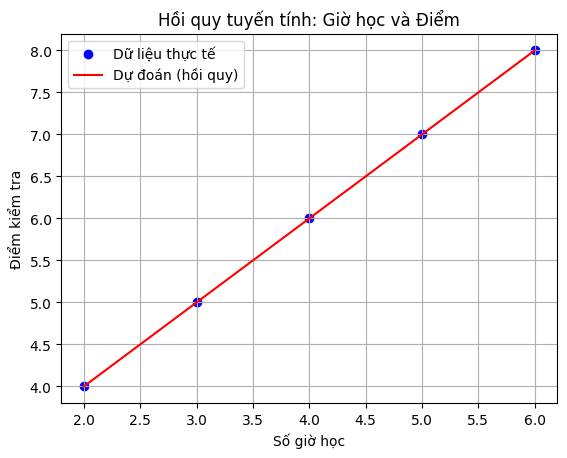

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dữ liệu từ bảng
data = {
    "x": [2, 3, 4, 5, 6],  # Giờ học
    "y": [4, 5, 6, 7, 8],  # Điểm
}

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Tách biến độc lập (X) và phụ thuộc (y)
X = df["x"].values.reshape(-1, 1)
y = df["y"].values

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị
y_pred = model.predict(X)

# Tính toán các hệ số hồi quy
beta_0 = model.intercept_  # Hệ số chặn
beta_1 = model.coef_[0]    # Hệ số dốc

# Đánh giá mô hình
r2 = r2_score(y, y_pred)  # Hệ số xác định R^2
mse = mean_squared_error(y, y_pred)  # Sai số bình phương trung bình (MSE)

# Hiển thị kết quả
print(f"Phương trình hồi quy: y = {beta_0:.2f} + {beta_1:.2f}x")
print(f"Hệ số chặn (beta_0): {beta_0}")
print(f"Hệ số dốc (beta_1): {beta_1}")
print(f"Hệ số xác định (R^2): {r2}")
print(f"Sai số bình phương trung bình (MSE): {mse}")

# Vẽ biểu đồ
plt.scatter(X, y, color="blue", label="Dữ liệu thực tế")
plt.plot(X, y_pred, color="red", label="Dự đoán (hồi quy)")
plt.title("Hồi quy tuyến tính: Giờ học và Điểm")
plt.xlabel("Số giờ học")
plt.ylabel("Điểm kiểm tra")
plt.legend()
plt.grid(True)
plt.show()